In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [193]:
n = 100

In [209]:
# Set delta as in the paper
rho = 10.0
# delta = np.random.normal(100, 10, n)
delta = np.array([float(n + 1 - i) for i in range(0, n)])
delta = np.sort(delta)
print(delta)

[   2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.   13.
   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.
   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.
   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.
   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.
   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.
   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.
   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.
   98.   99.  100.  101.]


In [210]:
# Set zeta
zeta = np.random.normal(5, 1, n)
# zeta = np.array([float(n - i) for i in range(0, n)])
print(zeta)

[ 6.984331    6.10347039  4.79094367  3.93704766  4.18538626  5.43614722
  4.70567847  5.11197486  5.00700438  2.73229739  5.60755742  4.4326778
  3.25268794  4.85585749  4.90086367  3.63320372  3.82154492  5.36390759
  4.56715549  5.76931047  4.99698611  5.84670197  2.97352325  6.00390495
  4.4117242   4.23493166  6.20401994  5.14349345  5.28836254  4.5725182
  5.34744495  6.34661437  4.05846179  2.22958212  5.31093748  4.01419042
  4.2394539   4.08089764  3.73065965  5.44952937  4.27876545  4.5297938
  4.01372826  4.88466545  4.1422082   6.1547188   6.22865392  5.85487706
  4.84825705  6.74322396  4.14137201  4.52914527  7.29089797  4.00368504
  5.24298195  4.69065743  4.05144794  5.95350669  5.55223581  5.09057888
  3.49203392  4.57943319  2.97571957  5.12483612  4.78991431  6.87810543
  3.58966334  5.12229418  5.74014932  4.40572238  4.72813714  5.37743216
  5.14398987  6.02238674  4.95405851  4.5843406   6.62695399  4.95132618
  3.59790353  5.97383416  2.59662045  6.21151607  4.91

In [151]:
def spectral_func(rho, delta, zeta, x):
    return rho + np.sum(zeta ** 2 / (delta - x))

In [39]:
def spectral_func_prime(delta, zeta, x):
    return np.sum(zeta ** 2/(delta - x) ** 2)

In [40]:
def g_spectral_func(rho, delta, zeta, x, k):
    if k == delta.shape[0]:
        k -= 1
    delta_reduced = np.delete(delta, [k, k+1])
    zeta_reduced = np.delete(zeta, [k, k+1])
    return spectral_func(rho, delta_reduced, zeta_reduced, x)

In [175]:
def h_spectral_func(rho, delta, zeta, x, k):
    if k == delta.shape[0]:
        k -= 1
    delta_reduced = delta[k : k+2]
    zeta_reduced = zeta[k : k+2]
    return spectral_func(rho, delta_reduced, zeta_reduced, x) - rho

In [42]:
def discriminant_formula_interior(a, b, c):
    if a <= 0:
        return float(a - np.sqrt(a ** 2 - 4 * b * c)) / float (2 * c)
    else:
        return float(2 * b) / float(a + np.sqrt(a ** 2 - 4 * b * c))

In [43]:
def discriminant_formula_exterior(a, b, c):
    if a >= 0:
        return float(a + np.sqrt(a ** 2 - 4 * b * c)) / float (2 * c)
    else:
        return float(2 * b) / float(a - np.sqrt(a ** 2 - 4 * b * c))

In [44]:
def interior_init(rho, delta, zeta, k):
    middle = float(delta[k] + delta[k+1]) / 2.0
    c = g_spectral_func(rho, delta, zeta, middle, k)
    d = delta[k+1] - delta[k]
    if spectral_func(rho, delta, zeta, middle) >= 0:
        a = c * d + zeta[k] ** 2 + zeta[k+1] ** 2
        b = zeta[k] ** 2 * d
        return discriminant_formula_interior(a, b, c) + delta[k]
    else:
        a = - c * d + zeta[k] ** 2 + zeta[k+1] ** 2
        b = - zeta[k + 1] ** 2 * d
        return discriminant_formula_interior(a, b, c) + delta[k + 1]    

In [176]:
def exterior_init(rho, delta, zeta):
    n = delta.shape[0]
    delta_n = delta[n - 1] + np.linalg.norm(zeta) ** 2 / float(rho)
    middle = float(delta[n - 1] + delta_n) / 2.0
    if spectral_func(rho, delta, zeta, middle) <= 0:
        if g_spectral_func(rho, delta, zeta, middle, n - 2) <= - h_spectral_func(rho, delta, zeta, delta_n, n - 2):
            return delta_n
        else:
            d = delta[n - 1] - delta[n - 2]
            c = g_spectral_func(rho, delta, zeta, middle, n - 2)
            a = - c * d +  zeta[n - 2] ** 2 + zeta[n - 1] ** 2
            b = - zeta[n - 1] ** 2 * d
            return discriminant_formula_exterior(a, b, c) + delta_n
    else:
        d = delta[n - 1] - delta[n - 2]
        c = g_spectral_func(rho, delta, zeta, middle, n - 2)
        a = - c * d +  zeta[n - 2] ** 2 + zeta[n - 1] ** 2
        b = - zeta[n - 1] ** 2 * d
        return discriminant_formula_exterior(a, b, c) + delta_n

In [196]:
y = np.zeros((n, ))
for k in range(0, n-1):
    y[k] = interior_init(rho, delta, zeta, k)
y[n - 1] = exterior_init(rho, delta, zeta)

In [197]:
y

array([    73.34444777,     82.72070289,     83.45106158,     85.81158959,
           87.02998447,     87.20069854,     87.3957983 ,     87.5445967 ,
           87.85185443,     88.04518299,     88.31192591,     88.42610956,
           88.67938225,     88.85998303,     89.25847646,     89.37664968,
           89.51961463,     89.9019216 ,     90.19274503,     92.06736815,
           92.58469456,     92.67259667,     93.06373868,     93.5941976 ,
           93.99567091,     94.21789333,     94.79036771,     94.9912379 ,
           95.12103593,     96.28934399,     96.34016467,     96.39184355,
           96.70189539,     96.96656954,     97.07797628,     97.17824853,
           97.28751384,     97.407223  ,     97.64115938,     97.82584335,
           97.98584351,     98.08781614,     98.26595957,     98.53585121,
           98.79485175,     98.879933  ,     99.01979282,     99.41162921,
           99.6553942 ,     99.9303177 ,    100.13981699,    100.22892381,
          100.47731659,  

In [154]:
def spectral_func_second(delta, zeta, x):
    return np.sum(2.0 * zeta ** 2 / (delta - x) ** 3)

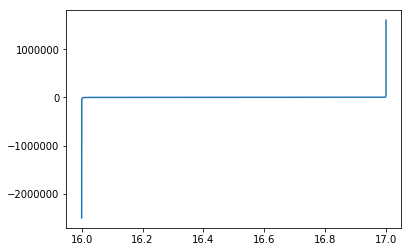

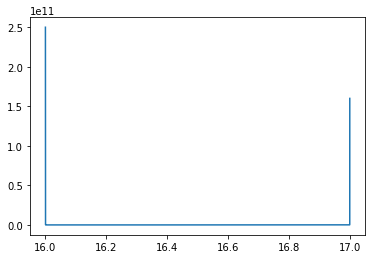

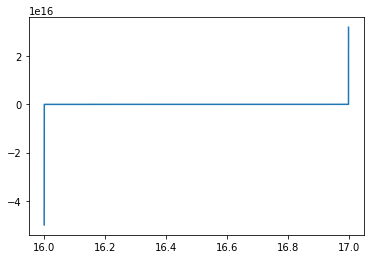

In [155]:
# Plot the functions between delta[k] and delta[k+1]
test_spectral = lambda x: spectral_func(rho, delta, zeta, x)

# Prime derivative
test_spectral_prime = lambda x: spectral_func_prime(delta, zeta, x)

test_spectral_second = lambda x: spectral_func_second(delta, zeta, x)

# Slight perturbation to avoid divergence on the plot
epsilon = 0.00001
k = 5
linspace = np.linspace(delta[k] + epsilon, delta[k+1] - epsilon, 10000)

# Compute the values and plot the original function
values = [test_spectral(x) for x in linspace]
plt.figure()
plt.plot(linspace, values)

# Compute the values and plot the derivative
values_prime = [test_spectral_prime(x) for x in linspace]
plt.figure()
plt.plot(linspace, values_prime)

# Compute the values and plot the second derivative
values_prime = [test_spectral_second(x) for x in linspace]
plt.figure()
plt.plot(linspace, values_prime)

# Show
plt.show()

In [179]:
def abc_gragg_interior(rho, delta, zeta, x, k):
    f = spectral_func(rho, delta, zeta, x)
    fprime = spectral_func_prime(delta, zeta, x)
    fsecond = spectral_func_second(delta, zeta, x)
    delta_k = delta[k] - x
    delta_kplus1 = delta[k+1] - x
    c = f - (delta_k + delta_kplus1) * fprime + delta_k * delta_kplus1 * fsecond / 2.0
    b = delta_k * delta_kplus1 * f
    a = (delta_k + delta_kplus1) * f - delta_k * delta_kplus1 * fprime 
    return a, b, c

In [180]:
def find_root_interior(rho, delta, zeta, x0, k, maxit, epsilon):
    i = 0
    f = 2 * np.sqrt(epsilon)
    x = x0
    while (np.abs(f) > epsilon) and (i < maxit):
        a, b, c = abc_gragg_interior(rho, delta, zeta, x, k)
        eta = discriminant_formula_interior(a, b, c)
        x += eta 
        f = spectral_func(rho, delta, zeta, x)
        i += 1
    return x

In [190]:
def find_root_exterior(rho, delta, zeta, x0, maxit, epsilon):
    i = 0
    f = 2 * epsilon
    x = x0
    while (np.abs(f) > epsilon) and (i < maxit):
        a, b, c = abc_gragg_interior(rho, delta, zeta, x, n - 2)
        print(a)
        print(b)
        print(c)
        eta = discriminant_formula_exterior(a, b, c)
        x += eta 
        f = spectral_func(rho, delta, zeta, x)
        i += 1
    print(i)
    return x

In [198]:
ytest = []
for k in range(0, n-1):
    ytest.append(find_root_interior(rho, delta, zeta, y[k], k, 10000, 1e-10))

In [199]:
ytest

[73.375560878466345,
 82.724222737859535,
 83.486460946602378,
 85.830816336783883,
 87.030220777202913,
 87.206660085897937,
 87.395871437103096,
 87.578100847006525,
 87.854082240820063,
 88.059705678056531,
 88.318298011146126,
 88.42610955779017,
 88.651792325246305,
 88.903373377540618,
 89.258476451085855,
 89.366554254417039,
 89.517729841443852,
 89.886242715402801,
 90.60185219521901,
 92.088776726032606,
 92.584694636945386,
 92.688577324475048,
 93.098310929522114,
 93.609669755333059,
 93.995918877801927,
 94.255129904273176,
 94.790254955983755,
 94.980153546168353,
 95.288530831594912,
 96.291667389409866,
 96.340164801685077,
 96.391828125546439,
 96.680509095622398,
 96.954034089414591,
 97.082116229631112,
 97.179377957262133,
 97.28749878205943,
 97.440741427689048,
 97.641161055358438,
 97.815028541876728,
 97.986937205506791,
 98.087401747205021,
 98.281298503298558,
 98.535687465069586,
 98.755772424060567,
 98.881786146079889,
 99.019328620547313,
 99.390128241243

In [200]:
ytest_ext = find_root_exterior(rho, delta, zeta, y[n-1], 1000, 1e-10)

-10472.8380529
280333.588013
0.99999413558
1


In [201]:
spectral_func(rho, delta, zeta,ytest_ext)

-9.9253938401488995e-14

In [204]:
ytest

[73.375560878466345,
 82.724222737859535,
 83.486460946602378,
 85.830816336783883,
 87.030220777202913,
 87.206660085897937,
 87.395871437103096,
 87.578100847006525,
 87.854082240820063,
 88.059705678056531,
 88.318298011146126,
 88.42610955779017,
 88.651792325246305,
 88.903373377540618,
 89.258476451085855,
 89.366554254417039,
 89.517729841443852,
 89.886242715402801,
 90.60185219521901,
 92.088776726032606,
 92.584694636945386,
 92.688577324475048,
 93.098310929522114,
 93.609669755333059,
 93.995918877801927,
 94.255129904273176,
 94.790254955983755,
 94.980153546168353,
 95.288530831594912,
 96.291667389409866,
 96.340164801685077,
 96.391828125546439,
 96.680509095622398,
 96.954034089414591,
 97.082116229631112,
 97.179377957262133,
 97.28749878205943,
 97.440741427689048,
 97.641161055358438,
 97.815028541876728,
 97.986937205506791,
 98.087401747205021,
 98.281298503298558,
 98.535687465069586,
 98.755772424060567,
 98.881786146079889,
 99.019328620547313,
 99.390128241243

In [205]:
fcontrol = [spectral_func(rho, delta, zeta, t) for t in ytest]

In [206]:
print(fcontrol)

[1.7374102156964e-11, -4.1637804315541871e-12, 1.2311929253883136e-11, -7.4551032014369412e-11, -1.7799690610331709e-09, -3.7363445670735018e-11, 5.0238035953498184e-11, 4.2832848379248389e-11, -2.581632685405566e-10, -1.6472156971758523e-11, -3.2437208474789259e-10, -8.2671634507036629e-06, 3.5244696050540369e-11, -3.9352965330863299e-11, -4.4641196517147819e-08, 3.8702685500879852e-10, 3.0237679027322883e-10, 4.7079673493044538e-11, -4.6784798257704097e-12, 5.0466297807361116e-11, 8.8464269687449359e-08, -1.1312728531720495e-10, -2.19824158875781e-11, 1.532018956140746e-11, 2.44670950166892e-10, 2.3979929153483681e-11, 2.1721557885712173e-10, -1.0367262603949712e-10, 1.2689405082255689e-11, -2.9620430552768084e-09, -2.8756681125230443e-07, 1.2222542977724515e-09, -4.7341686126856075e-11, -8.2849282989627682e-12, 9.5380592313176749e-11, 4.7293902127876208e-10, -2.127489295844498e-10, 3.3145042266369273e-11, -3.8346687603052487e-08, 7.1073813501243421e-11, -4.8430859322934339e-10, 6.44